In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [3]:
data = pd.read_csv('student-mat.csv', sep=';')

In [4]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
(data.isin([0]).sum()).sort_values(ascending=False)

failures      312
absences      115
G3             38
G2             13
Medu            3
Fedu            2
age             0
address         0
famsize         0
Pstatus         0
sex             0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
famsup          0
schoolsup       0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
G1              0
school          0
dtype: int64

In [6]:
entier=data.select_dtypes(include=np.int64)
objet=data.select_dtypes(include=np.object)

In [7]:
entier.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [8]:
entier.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


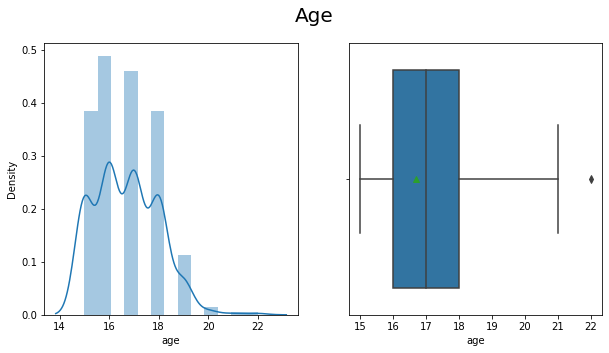

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Age', fontsize=20)
sns.distplot(entier['age'], ax=ax[0])
sns.boxplot(entier['age'], ax=ax[1],showmeans=True)
## sns.histplot(entier['age'], ax=ax[2])
plt.show()

In [10]:
objet.describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


NameError: name 'labels' is not defined

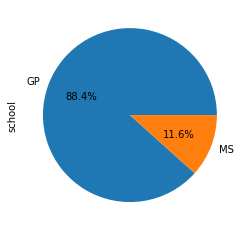

In [11]:
objet["school"].value_counts().plot(kind="pie", autopct="%.1f%%")
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)

F    208
M    187
Name: sex, dtype: int64

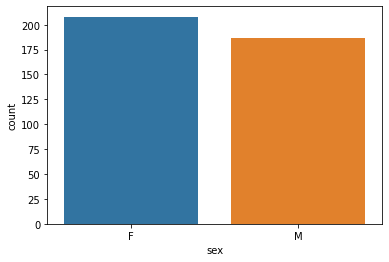

In [12]:
sns.countplot(x="sex", data=objet)
objet.sex.value_counts()

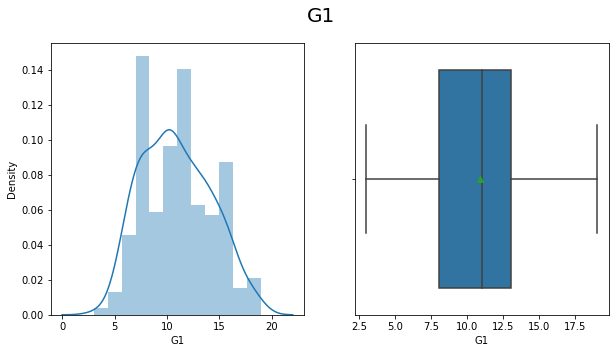

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('G1', fontsize=20)
sns.distplot(entier['G1'], ax=ax[0])
sns.boxplot(entier['G1'], ax=ax[1],showmeans=True)
plt.show()

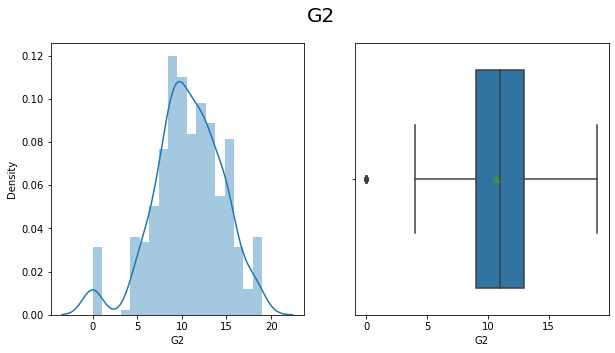

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('G2', fontsize=20)
sns.distplot(entier['G2'], ax=ax[0])
sns.boxplot(entier['G2'], ax=ax[1],showmeans=True)
plt.show()

In [15]:
conditions = [
    (data['G3'] >= 0) & (data['G3'] <= 9),
    (data['G3'] >= 10) & (data['G3'] <= 11),
    (data['G3'] >= 12) & (data['G3'] <= 13),
    (data['G3'] >= 14) & (data['G3'] <= 15),
    (data['G3'] >= 16)]
Binary = ['[0-9]', '[10-11]', '[12-13]', '[14-15]','[16-20]']
Classes = ['fail', 'sufficient', 'satisfactory', 'good','excellent/very good']


data['score_G3_binary'] = np.select(conditions,Binary)
data['score_G3_classes'] = np.select(conditions,Classes)
data['G1+G2_ratio'] = (data['G1']+data['G2'])/2

In [16]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,score_G3_binary,score_G3_classes,G1+G2_ratio
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,[0-9],fail,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,[0-9],fail,5.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,[10-11],sufficient,7.5
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,[14-15],good,14.5
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,[10-11],sufficient,8.0


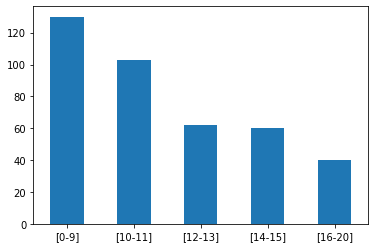

In [17]:
data['score_G3_binary'].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:>

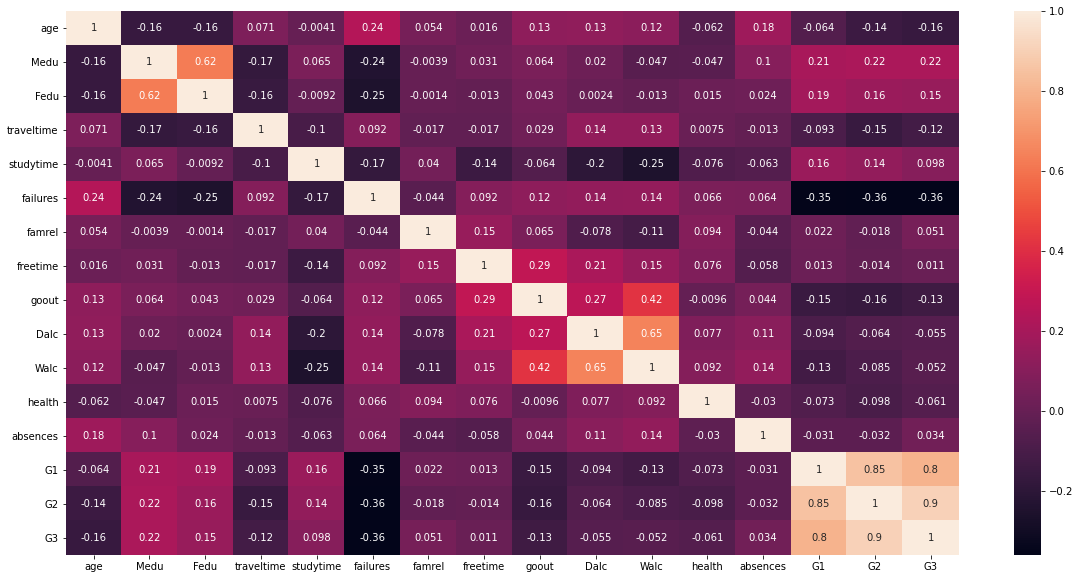

In [18]:
fig = plt.subplots(figsize=(20,10))
sns.heatmap(entier.corr(), annot=True)

In [19]:
## Explain correlation

In [20]:
## Partie 3

In [21]:
## Pertinence d'un modèle linéaire -> lorsque les attributs sont normés

In [22]:
dummy = pd.get_dummies(data)
dummy.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G1+G2_ratio,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,score_G3_binary_[0-9],score_G3_binary_[10-11],score_G3_binary_[12-13],score_G3_binary_[14-15],score_G3_binary_[16-20],score_G3_classes_excellent/very good,score_G3_classes_fail,score_G3_classes_good,score_G3_classes_satisfactory,score_G3_classes_sufficient
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,5.5,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,5.0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,7.5,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,14.5,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,8.0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1


In [23]:
dummies = pd.get_dummies(objet)
df = pd.concat([dummies, entier], axis=1)

df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [24]:
X = df
y = data['G1+G2_ratio']
y_classified = data['score_G3_classes']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_classified, X_test_classified, y_train_classified, y_test_classified = train_test_split(X, y_classified, test_size=0.3)

In [27]:
display(X_train.shape, X_test.shape)

(276, 59)

(119, 59)

In [28]:
from sklearn import linear_model

In [29]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
print(f"valeur_prédite={y_pred[1]}")

valeur_prédite=8.500000000000021


In [31]:
print(f"valeur_attendu={y_test.iloc[1]}")

valeur_attendu=8.5


In [32]:
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, log_loss
mean_squared_error(y_test, y_pred)

3.1543166767337313e-28

In [33]:
from sklearn.neighbors import KNeighborsRegressor
neighbor = KNeighborsRegressor(n_neighbors=10)
neighbor.fit(X_train, y_train)
neighbor_pred = neighbor.predict(X_test)

## For loop KNN

In [34]:
mean_squared_error(y_test, neighbor_pred)

0.3542647058823529

In [35]:
k_range = range(1,21)
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train_classified,y_train_classified)
    print(f'{k} ---> {np.round(model.score(X_test_classified,y_test_classified),2)}')

NameError: name 'KNeighborsClassifier' is not defined

In [36]:
from sklearn.neighbors import KNeighborsClassifier
neighborClassified = KNeighborsClassifier(n_neighbors=12)
neighborClassified.fit(X_train_classified, y_train_classified)
neighborClassified_pred = neighborClassified.predict(X_test_classified)

In [37]:
print(classification_report(y_test_classified, neighborClassified_pred))

                     precision    recall  f1-score   support

excellent/very good       1.00      0.75      0.86        12
               fail       0.97      0.90      0.94        40
               good       0.65      0.93      0.76        14
       satisfactory       0.64      0.53      0.58        17
         sufficient       0.82      0.89      0.85        36

           accuracy                           0.83       119
          macro avg       0.82      0.80      0.80       119
       weighted avg       0.84      0.83      0.83       119



In [38]:
print(confusion_matrix(y_test_classified, neighborClassified_pred))

[[ 9  0  2  1  0]
 [ 0 36  0  0  4]
 [ 0  0 13  1  0]
 [ 0  0  5  9  3]
 [ 0  1  0  3 32]]
